# Deep Learning with MNIST

## Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

## Importing Data

In [2]:
raw_train = pd.read_csv('mnist_data/train.csv')
test_X = pd.read_csv('mnist_data/test.csv')

In [3]:
print("Rows in training set:", raw_train.shape[0])
display(raw_train.head())
print("Rows in test set:", test_X.shape[1])
display(test_X.head())

Rows in training set: 42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Rows in test set: 784


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_train.groupby('label')[['label']].count()

,label
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


## Generating a Train-Validation Split for the Dataset

In [5]:
# Here, we first randomly shuffle the data, then use an 80 (training set size) - 20 (test set size) split to create two
# distinct datasets
shuffled = raw_train.sample(frac=1)

split_index = int(.8 * len(shuffled))

# Training set will constitute 80% of the original raw training data
train = raw_train.iloc[:split_index]

# Validation set will constitute the other 20% of the raw training data
val = raw_train.iloc[split_index:]

# Finally, separate the label column from the features for convenience during model training
train_X, train_y = train.iloc[:, train.columns != 'label'].reset_index(drop=True), train['label'].reset_index(drop=True)
val_X, val_y = val.iloc[:, val.columns != 'label'].reset_index(drop=True), val['label'].reset_index(drop=True)

In [6]:
display(train_X.head())
display(train_y.head())
display(val_X.head())
display(val_y.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    7
2    7
3    2
4    2
Name: label, dtype: int64

## Visualizing the Dataset

Since each row represents a 28 x 28 image flattened into a 1-D array where each pixel value represents the shade of the color of that pixel, we can use functions available in the **matplotlib** package to actually visualize each row as images. Here are a few examples below:

Showing image 0 with truth label: 1


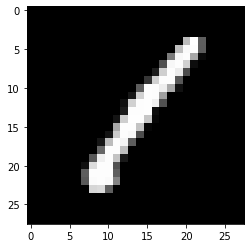

Showing image 1 with truth label: 0


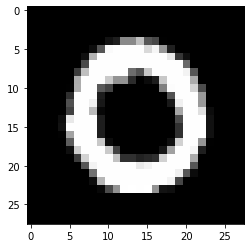

Showing image 2 with truth label: 1


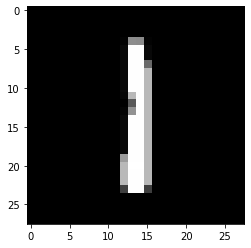

Showing image 3 with truth label: 4


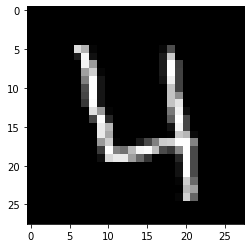

Showing image 4 with truth label: 0


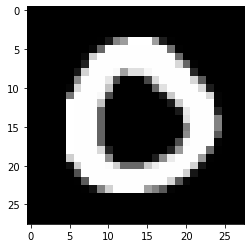

In [9]:
for i in range(5):
    print("Showing image", i, "with truth label:", train_y.iloc[i])
    row = np.array(train_X.iloc[i])
    # Reshape the row into a 28 x 28 matrix
    reshaped = row.reshape(28, 28)
    plt.imshow(reshaped, cmap="gray")
    plt.show()

## Supervised Learning

In [17]:
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

### Benchmark Classifier for Comparison: Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [13]:
rf.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [22]:
rf_train_predictions = rf.predict(train_X)
rf_val_predictions = rf.predict(val_X)

In [23]:
rf_val_predictions

array([0, 7, 7, ..., 7, 6, 9])

In [26]:
calculate_accuracy(rf_val_predictions, val_y)

0.9629761904761904

**Validation Accuracy: 96.3%**

### Deep Learning Classifier: Feed-Forward Neural Network

### Deep Learning Classifier: Convolutional Neural Network